<a href="https://colab.research.google.com/github/MirMustafaAli594/Internship-Ai-CNN-project-Face-mask-detection/blob/main/Project_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [7]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 76% 124M/163M [00:00<00:00, 1.29GB/s]
100% 163M/163M [00:00<00:00, 1.18GB/s]


In [8]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

 data   face-mask-dataset.zip   kaggle.json   sample_data  'test3 mask.jpg'


**Importing the Dependencies**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3331.jpg', 'with_mask_553.jpg', 'with_mask_1107.jpg', 'with_mask_1937.jpg', 'with_mask_2939.jpg']
['with_mask_3020.jpg', 'with_mask_376.jpg', 'with_mask_3430.jpg', 'with_mask_2510.jpg', 'with_mask_1971.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1504.jpg', 'without_mask_386.jpg', 'without_mask_840.jpg', 'without_mask_1921.jpg', 'without_mask_3305.jpg']
['without_mask_3673.jpg', 'without_mask_979.jpg', 'without_mask_2607.jpg', 'without_mask_316.jpg', 'without_mask_2140.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [14]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

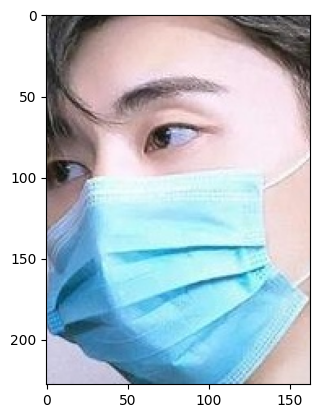

In [18]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

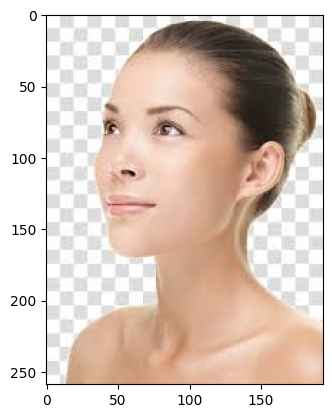

In [19]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

array([[[252, 231, 204],
        [254, 237, 213],
        [255, 246, 228],
        ...,
        [184, 156, 129],
        [183, 158, 132],
        [184, 164, 141]],

       [[252, 232, 205],
        [254, 239, 214],
        [255, 247, 228],
        ...,
        [186, 158, 131],
        [191, 170, 148],
        [225, 214, 199]],

       [[251, 233, 205],
        [254, 241, 215],
        [254, 248, 229],
        ...,
        [201, 185, 165],
        [241, 235, 227],
        [255, 254, 250]],

       ...,

       [[206, 189, 171],
        [201, 184, 168],
        [187, 169, 155],
        ...,
        [188, 178, 169],
        [176, 163, 150],
        [175, 159, 143]],

       [[207, 190, 172],
        [204, 187, 171],
        [195, 177, 162],
        ...,
        [179, 165, 156],
        [165, 152, 140],
        [177, 161, 147]],

       [[207, 190, 172],
        [206, 189, 173],
        [199, 181, 167],
        ...,
        [180, 161, 145],
        [181, 164, 148],
        [182, 164, 149]]], dtype=uint8)
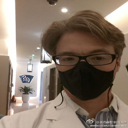

In [23]:
data[0]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[211, 213, 199],
        [211, 213, 199],
        [212, 214, 200],
        ...,
        [135,  95, 109],
        [150,  99, 107],
        [136,  82,  96]],

       [[211, 213, 199],
        [213, 215, 201],
        [214, 216, 202],
        ...,
        [124,  91, 108],
        [137,  96, 106],
        [140,  95, 107]],

       [[211, 213, 199],
        [214, 216, 202],
        [212, 214, 200],
        ...,
        [ 71,  52,  73],
        [ 99,  75,  89],
        [117,  85, 101]],

       ...,

       [[ 85,  97, 111],
        [ 81,  96, 109],
        [ 81,  99, 111],
        ...,
        [176, 182, 174],
        [181, 185, 174],
        [184, 187, 179]],

       [[ 89, 102, 116],
        [ 85, 100, 113],
        [ 83, 102, 114],
        ...,
        [176, 182, 174],
        [180, 184, 173],
        [182, 185, 177]],

       [[ 89, 103, 117],
        [ 83,  99, 112],
        [ 82, 101, 113],
        ...,
        [175, 180, 173],
        [178, 182, 172],
        [177, 180, 173]]], dtype=uint8)
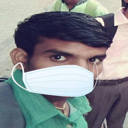

In [34]:
X_train[0]

In [35]:
X_train_scaled[0]

array([[[0.82745098, 0.83529412, 0.78039216],
        [0.82745098, 0.83529412, 0.78039216],
        [0.83137255, 0.83921569, 0.78431373],
        ...,
        [0.52941176, 0.37254902, 0.42745098],
        [0.58823529, 0.38823529, 0.41960784],
        [0.53333333, 0.32156863, 0.37647059]],

       [[0.82745098, 0.83529412, 0.78039216],
        [0.83529412, 0.84313725, 0.78823529],
        [0.83921569, 0.84705882, 0.79215686],
        ...,
        [0.48627451, 0.35686275, 0.42352941],
        [0.5372549 , 0.37647059, 0.41568627],
        [0.54901961, 0.37254902, 0.41960784]],

       [[0.82745098, 0.83529412, 0.78039216],
        [0.83921569, 0.84705882, 0.79215686],
        [0.83137255, 0.83921569, 0.78431373],
        ...,
        [0.27843137, 0.20392157, 0.28627451],
        [0.38823529, 0.29411765, 0.34901961],
        [0.45882353, 0.33333333, 0.39607843]],

       ...,

       [[0.33333333, 0.38039216, 0.43529412],
        [0.31764706, 0.37647059, 0.42745098],
        [0.31764706, 0

**Building a Convolutional Neural Networks (CNN)**

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - acc: 0.7109 - loss: 0.6672 - val_acc: 0.8512 - val_loss: 0.3181
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8797 - loss: 0.2942 - val_acc: 0.8810 - val_loss: 0.2466
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9044 - loss: 0.2361 - val_acc: 0.9107 - val_loss: 0.2217
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9332 - loss: 0.1913 - val_acc: 0.9008 - val_loss: 0.2102
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9375 - loss: 0.1627 - val_acc: 0.9174 - val_loss: 0.2421


**Model Evaluation**

In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9306 - loss: 0.1921
Test Accuracy = 0.9272005558013916


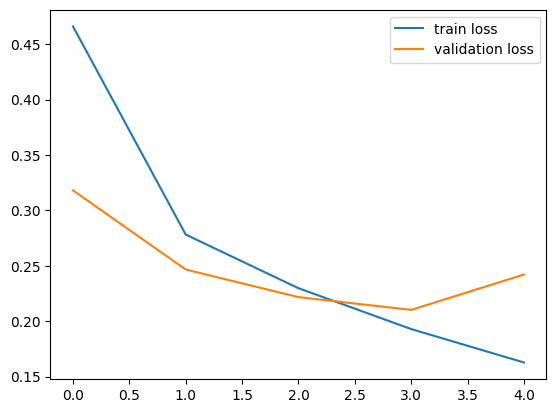

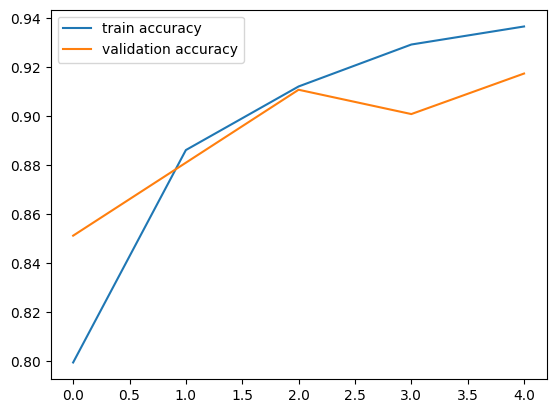

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/test2.png


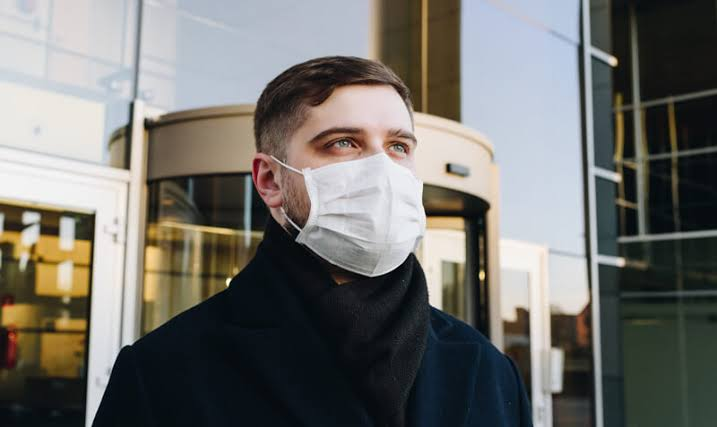

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0.15443578 0.6113166 ]]
1
The person in the image is wearing a mask


In [48]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test4.jpg


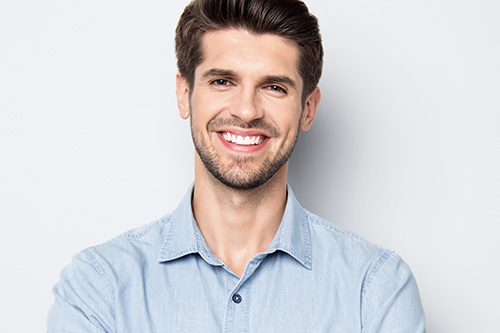

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.6107048  0.24153808]]
0
The person in the image is not wearing a mask


In [50]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')